In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/world-development-indicators-2022/WDISeries.csv
/kaggle/input/world-development-indicators-2022/indicators.sqlite
/kaggle/input/world-development-indicators-2022/WDICountry-Series.csv
/kaggle/input/world-development-indicators-2022/WDICountry.csv
/kaggle/input/world-development-indicators-2022/WDIFootNote.csv
/kaggle/input/world-development-indicators-2022/WDIData.csv
/kaggle/input/world-development-indicators-2022/WDISeries-Time.csv


In [2]:
# Adress of database
adress='/kaggle/input/world-development-indicators-2022/indicators.sqlite'

# IMPORTING

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

In [4]:
con = sqlite3.connect(adress)

# Exploratory of data

In [5]:
#Show tables
tables = pd.read_sql('''select * from sqlite_master where type='table';''', con)
print("TABLES OF DATABASE")
tables


TABLES OF DATABASE


,type,name,tbl_name,rootpage,sql
0,table,Country,Country,2,"CREATE TABLE Country (\n CountryCode TEXT,\..."
1,table,CountryNotes,CountryNotes,186,CREATE TABLE CountryNotes (\n Countrycode T...
2,table,Series,Series,948,"CREATE TABLE Series (\n SeriesCode TEXT,\n ..."
3,table,Indicators,Indicators,4448,CREATE TABLE Indicators (\n CountryName TEX...
4,table,SeriesNotes,SeriesNotes,1317550,CREATE TABLE SeriesNotes (\n Seriescode TEX...
5,table,Footnotes,Footnotes,1317587,CREATE TABLE Footnotes (\n Countrycode TEXT...


In [6]:
country=pd.read_sql('''select * from Country;''', con)
country.head(2)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006


In [7]:
country['Region'].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', '',
       'North America'], dtype=object)

# Filter data 

## Separate countries of Middle East & North Africa for Analysis

In [8]:
country=pd.read_sql('''select ShortName from Country
where Region ='Middle East & North Africa';''', con)
country

,ShortName
0,Algeria
1,Bahrain
2,Djibouti
3,Egypt
4,Iran
5,Iraq
6,Israel
7,Jordan
8,Kuwait
9,Lebanon


In [9]:
# Drop Fake countries
if "Israel" in country:
    country.drop(6, axis=0, inplace = True)

In [10]:
# Convert name of Egypt to match same name in Indicators table
country['ShortName'].replace({'Egypt':'Egypt, Arab Rep.'}, inplace=True)

In [11]:
c=country['ShortName'].unique()

In [12]:
# Tuple of countries to filter
tuple(list(c))

('Algeria',
 'Bahrain',
 'Djibouti',
 'Egypt, Arab Rep.',
 'Iran',
 'Iraq',
 'Israel',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Malta',
 'Morocco',
 'Oman',
 'Qatar',
 'Saudi Arabia',
 'Syrian Arab Republic',
 'Tunisia',
 'United Arab Emirates',
 'West Bank and Gaza',
 'Yemen')

In [13]:
indicator=pd.read_sql('''select * from Indicators where CountryName 
in ('Algeria',
 'Bahrain',
 'Djibouti',
 'Egypt, Arab Rep.',
 'Iran',
 'Iraq',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Malta',
 'Morocco',
 'Oman',
 'Qatar',
 'Saudi Arabia',
 'Syrian Arab Republic',
 'Tunisia',
 'United Arab Emirates',
 'West Bank and Gaza',
 'Yemen');''',con) 
indicator.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Algeria,DZA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,123.88920
1,Algeria,DZA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,91.42517


In [14]:
indicator.shape

(430306, 6)

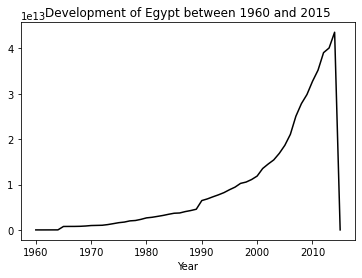

In [15]:
Egypt=indicator[(indicator['CountryName']=='Egypt, Arab Rep.')].groupby('Year')['Value'].sum()
Egypt.plot(color="#000")
plt.title("Development of Egypt between 1960 and 2015");

### Total value of development indicator decrease by year 2014 but that may because of the decrease of available indicators in these year, I will check that by calculating the number of indicators for each year

In [16]:
# calculate indicators of each country of each year
pd.DataFrame(indicator.groupby(['CountryName', 'Year'])['IndicatorCode'].count())

IndicatorCode
CountryName        Year               
Algeria            1960            176
                   1961            203
                   1962            189
                   1963            187
                   1964            199
...                                ...
West Bank and Gaza 2011            605
                   2012            595
                   2013            603
                   2014            293
                   2015             52

[1008 rows x 1 columns]

### Number of Indicators are not the same for each year of same country so we can not compare development of countries over the years!

### Indicators for 2015 year for most companies are a little that will make false development decrease.

In [17]:
# calculate indicators for each countries
pd.DataFrame(indicator.groupby('CountryName')['IndicatorCode'].count())

,IndicatorCode
CountryName,
Algeria,34578
Bahrain,17278
Djibouti,22923
"Egypt, Arab Rep.",35367
Iraq,16792
Jordan,34050
Kuwait,19690
Lebanon,27334
Libya,13943


### Number of Indicators are not the same for each country so we can not compare development progress of countries to each other!

In [18]:
# calculate indicators of Egypt over years
ind_of_egy = pd.DataFrame(indicator[indicator['CountryName']=='Egypt, Arab Rep.'].groupby(['CountryName', 'Year'])['IndicatorCode'].count())

In [19]:
ind=pd.read_sql('''select distinct IndicatorName from Indicators;''', con)
ind

,IndicatorName
0,"2005 PPP conversion factor, GDP (LCU per inter..."
1,"2005 PPP conversion factor, private consumptio..."
2,ARI treatment (% of children under 5 taken to ...
3,Access to electricity (% of population)
4,"Access to electricity, rural (% of rural popul..."
...,...
1339,Women's share of population ages 15+ living wi...
1340,"Youth literacy rate, population 15-24 years, b..."
1341,"Youth literacy rate, population 15-24 years, f..."
1342,"Youth literacy rate, population 15-24 years, g..."


### There are 1344 different indicators

In [20]:
ind=pd.read_sql('''select distinct IndicatorName from Indicators;''', con)
ind[1000:]

,IndicatorName
1000,"PPG, official creditors (NTR, current US$)"
1001,"PPG, official creditors (TDS, current US$)"
1002,"PPG, other private creditors (AMT, current US$)"
1003,"PPG, other private creditors (DIS, current US$)"
1004,"PPG, other private creditors (DOD, current US$)"
...,...
1339,Women's share of population ages 15+ living wi...
1340,"Youth literacy rate, population 15-24 years, b..."
1341,"Youth literacy rate, population 15-24 years, f..."
1342,"Youth literacy rate, population 15-24 years, g..."


In [21]:
# Number of available indicators over years of Egypt.
indicator[indicator['CountryName']=='Egypt, Arab Rep.'].groupby('IndicatorCode')['IndicatorCode'].count()

IndicatorCode
AG.AGR.TRAC.NO              48
AG.CON.FERT.PT.ZS           12
AG.CON.FERT.ZS              12
AG.LND.AGRI.K2              53
AG.LND.AGRI.ZS              53
                            ..
per_sa_allsa.ben_q1_tot      1
per_sa_allsa.cov_pop_tot     1
per_si_allsi.adq_pop_tot     1
per_si_allsi.ben_q1_tot      1
per_si_allsi.cov_pop_tot     1
Name: IndicatorCode, Length: 1263, dtype: int64

# Analysis of Development of Egypt

In [22]:
egypt = indicator[indicator['CountryName']=='Egypt, Arab Rep.']

In [23]:
indicator.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
430301,West Bank and Gaza,WBG,Time required to get electricity (days),IC.ELC.TIME,2015,63.0
430302,West Bank and Gaza,WBG,Time required to register property (days),IC.PRP.DURS,2015,49.0
430303,West Bank and Gaza,WBG,Time required to start a business (days),IC.REG.DURS,2015,44.0
430304,West Bank and Gaza,WBG,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,162.0
430305,West Bank and Gaza,WBG,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,15.3


In [24]:
# Function to calculate development of different indicators over years by the name of indicatorcode
def calc (indicator_code):
    result = egypt[egypt['IndicatorCode']==indicator_code][['IndicatorName', 'Value','Year']]
    return result

In [25]:
sns.set_style('darkgrid')

In [26]:
#Time required to start a business (days) of Egypt
buss_eg = calc('IC.REG.DURS')

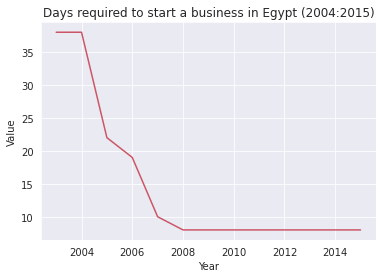

In [27]:
sns.lineplot(x=buss_eg['Year'], y=buss_eg["Value"], color='#c56')
plt.title('Days required to start a business in Egypt (2004:2015)');

In [28]:
#Time required to get electricity (days) of Egypt
elect_eg =calc('IC.ELC.TIME')

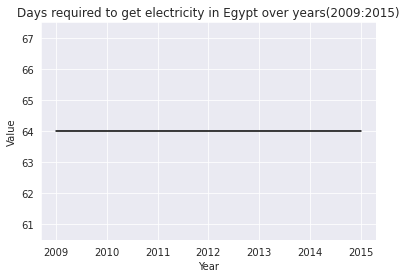

In [29]:
sns.lineplot(x=elect_eg['Year'], y=elect_eg["Value"], color='#000')
plt.title('Days required to get electricity in Egypt over years(2009:2015)');

In [30]:
#Time to prepare and pay taxes (hours) of Egypt
tax_eg = calc('IC.TAX.DURS')

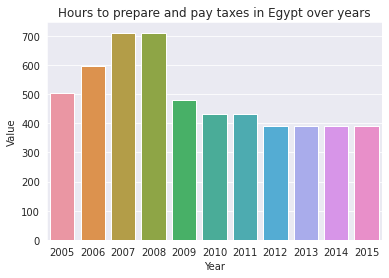

In [31]:
sns.barplot(x=tax_eg['Year'], y=tax_eg["Value"])
plt.title('Hours to prepare and pay taxes in Egypt over years');

In [32]:
#Fertilizer consumption (kilograms per hectare of Egypt)
fer_eg = calc('AG.CON.FERT.ZS')

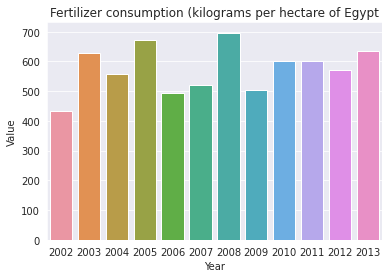

In [33]:
sns.barplot(x=fer_eg['Year'], y=fer_eg["Value"])
plt.title('Fertilizer consumption (kilograms per hectare of Egypt');

In [34]:
#Agriculture land (sq.km) of Egypt over years
Ag_Eg = calc('AG.LND.AGRI.K2')

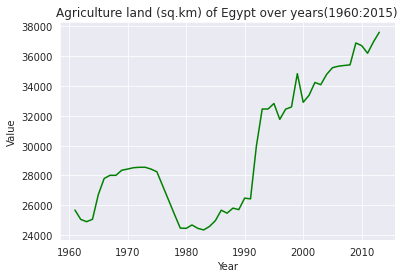

In [35]:
sns.lineplot(x=Ag_Eg['Year'], y=Ag_Eg["Value"], color="g")
plt.title('Agriculture land (sq.km) of Egypt over years(1960:2015)');

In [36]:
egypt.nunique()

CountryName          1
CountryCode          1
IndicatorName     1263
IndicatorCode     1263
Year                56
Value            29337
dtype: int64

In [37]:
co2_eg = calc('EN.ATM.CO2E.KT')

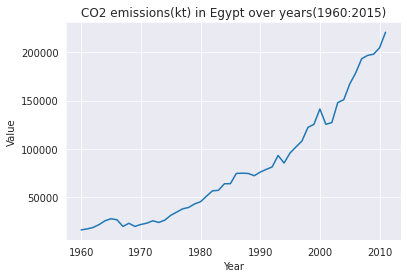

In [38]:
sns.lineplot(x=co2_eg['Year'], y=co2_eg["Value"])
plt.title('CO2 emissions(kt) in Egypt over years(1960:2015)');

In [39]:
# Get First 20 row for visualiation
egy = egypt[['IndicatorCode','Year', 'Value', 'IndicatorName']].iloc[:20,:]

In [40]:
#Titles of charts
titles = list(egy['IndicatorName'])

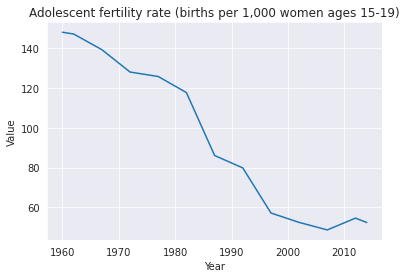

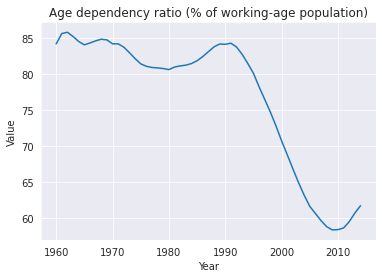

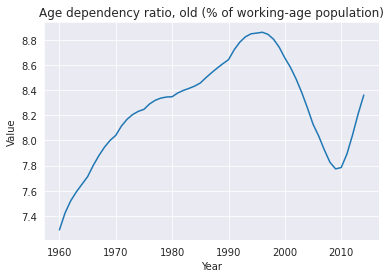

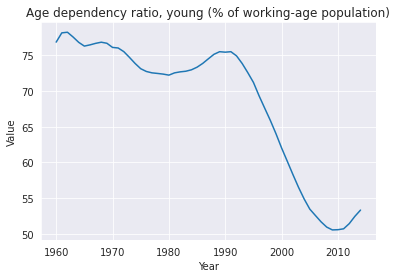

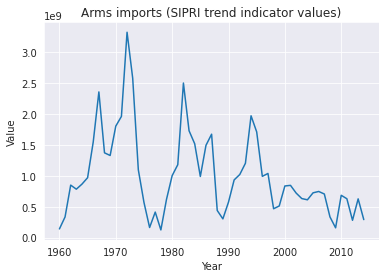

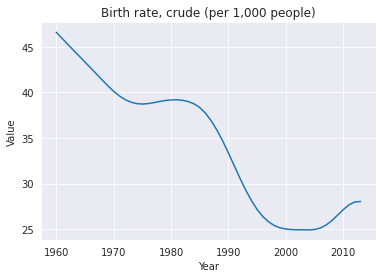

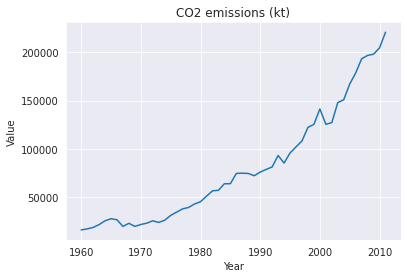

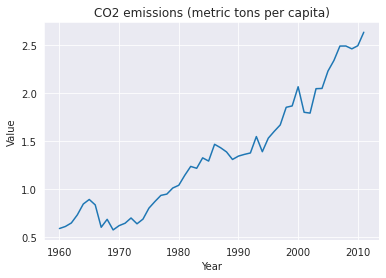

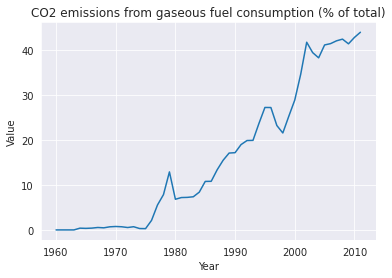

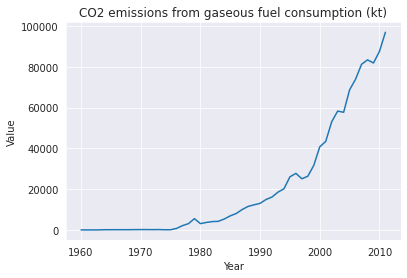

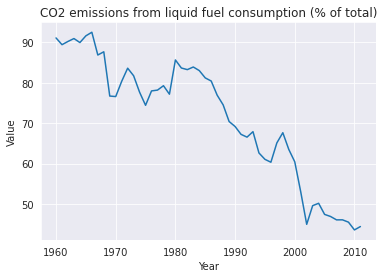

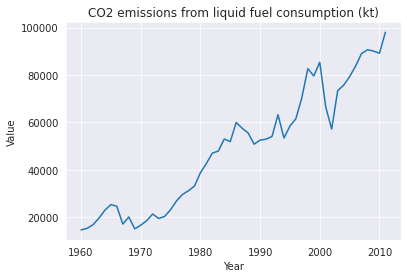

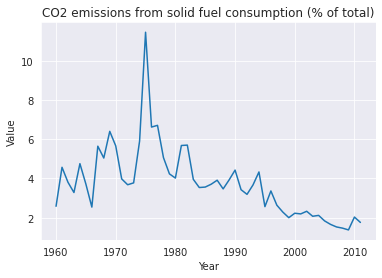

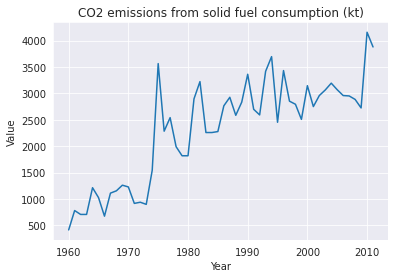

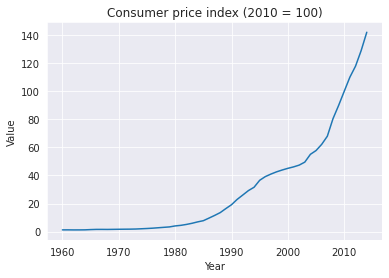

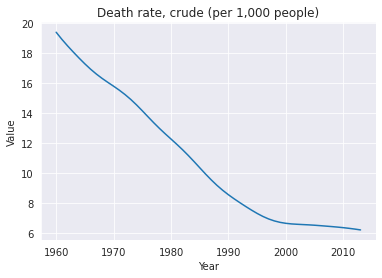

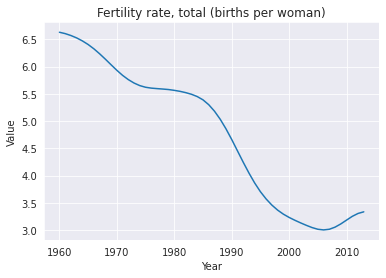

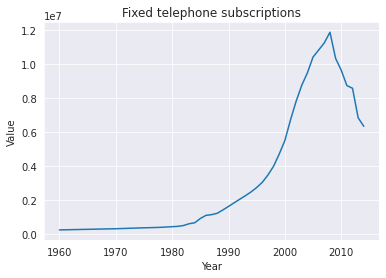

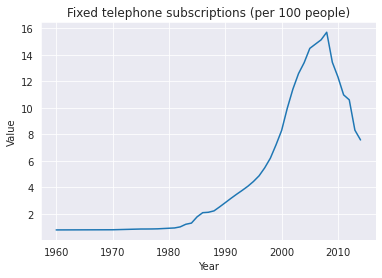

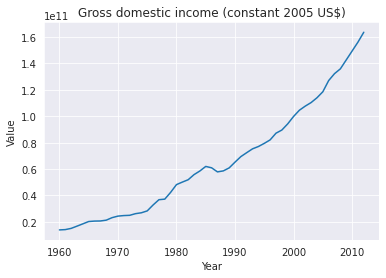

In [41]:
# plot of 20 indicators over years
n = 0
for i in egy['IndicatorCode']:
    result=calc(i)
    f=sns.lineplot(x=result['Year'], y=result["Value"])
    plt.title(titles[n])
    n +=1
    plt.show()

## Hope you like my analysis.